# Project: Linear Regression

#### Name: Jocelyn Shen

### Datasets
 [this pdf](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf).  It contains a bunch of descriptions of datasets.  

* Advertising: A collection of 200 datapoints consisting of the following variables/columns:
 * `Sales`: sales of a particular item in different markets, in thousands of units,
 * `TV`, `Radio`, `Newspaper`: advertising budgets of each media type, in the corresponding market, in thousands of dollars.
* Auto: A collection of 392 datapoints consisting of the following variables:
 * `mpg`: miles per gallon

 * `cylinders`: Number of cylinders between 4 and 8
 * `displacement`: Engine displacement (cu. inches)
 * `horsepower`: Engine horsepower
 * `weight`: Vehicle weight (lbs.)
 * `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
 * `year`: Model year (modulo 100)
 * `origin`: Origin of car (1. American, 2. European, 3. Japanese)
 * `name`: Vehicle name


### Machine-Learning language: Modeling, and Predictors versus Response

* In the Advertising dataset, the response is `Sales`, and the predictors are `Radio`, `TV`, and `Newspaper`.

* In the Auto dataset, the response is `horsepower`, and the predictors are `mpg`, `cylinders`, `displacement`, `weight`, `acceleration`, `year`, `origin`, and `name`

### Using your own model versus Scikit-Learn

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression ## Woah!  A new one!
import seaborn
from scipy import stats

%matplotlib inline


## Part 1: Advertising

### Load the dataset

Our first task is to load the data and make sure it has no missing information.  Then call `head()` on the dataset to make sure it loaded appropriately.

In [4]:
# your code here
df = pd.read_csv('Advertising.csv', index_col = 0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#your code here
df[df.isnull().any(axis = 1)]

,TV,Radio,Newspaper,Sales


### Summary Statistics and Visualizing the data
 
Histogram of each column

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AA4B9AAC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024AA5204860>]], dtype=object)

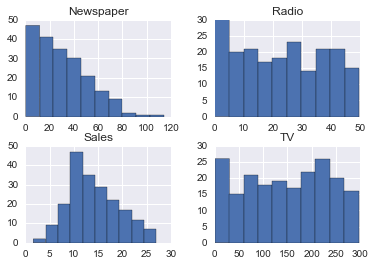

In [7]:
# your code here
print(df.describe())
df.hist()

Scatterplots of Predictors vs. Response

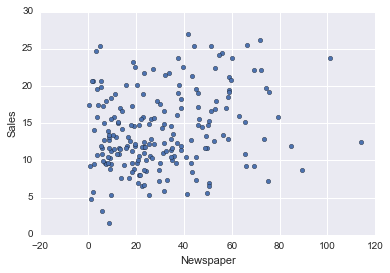

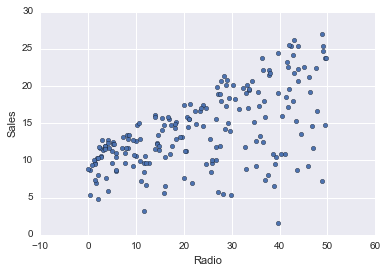

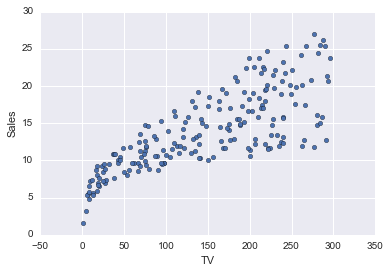

In [8]:
# your code here
df.plot('Newspaper', 'Sales', kind = 'scatter')
df.plot('Radio', 'Sales', kind = 'scatter')
df.plot('TV', 'Sales', kind = 'scatter')

### Produce the model


In [9]:
# Slice the dataframe!
# X = ... and y = .... df[df["Sales"] > df["Sales"].mean()]
X = np.array(df[["Newspaper","Radio","TV"]])
y = df["Sales"]

In [10]:
# run me!
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

There are a few things we can do with this model.  We can see what this model has as useful attributes.  Here we're hiding what's in the list of attributes that are _under-the-hood_ things, by removing those with a leading underscore.  (See how useful naming conventions are?)

In [11]:
# run me!
print(*[item for item in dir(model) if item[0]!="_"], sep='\n')

coef_
copy_X
decision_function
fit
fit_intercept
get_params
intercept_
n_jobs
normalize
predict
rank_
residues_
score
set_params
singular_


#### Visualizing the model

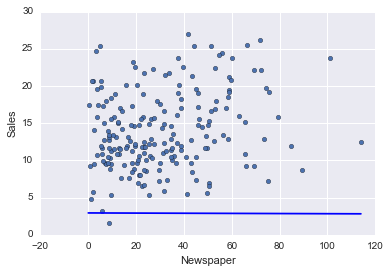

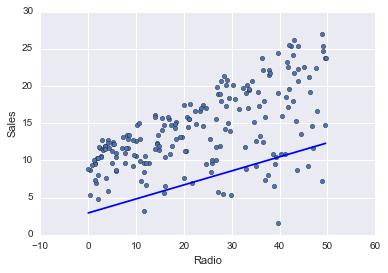

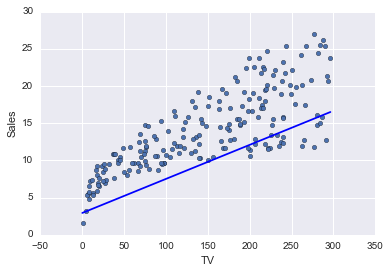

In [12]:
# Plugging in 0
df.plot("Newspaper", "Sales", kind = "scatter")
m_n = model.coef_[0]
b_n = model.intercept_
x = np.linspace(0,max(df["Newspaper"]), 10)
abline_values = [m_n * i + b_n for i in x]
plt.plot(x, abline_values, 'b')
plt.show()
df.plot("Radio", "Sales", kind = "scatter")
m_r = model.coef_[1]
b_r = model.intercept_
x = np.linspace(0,max(df["Radio"]), 10)
abline_values = [m_r * i + b_r for i in x]
plt.plot(x, abline_values, 'b')
plt.show()
df.plot("TV", "Sales", kind = "scatter")
m_t = model.coef_[2]
b_t = model.intercept_
x = np.linspace(0,max(df["TV"]), 10)
abline_values = [m_t * i + b_t for i in x]
plt.plot(x, abline_values, 'b')
plt.show()

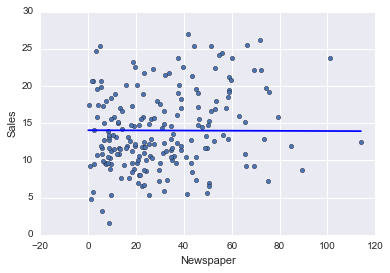

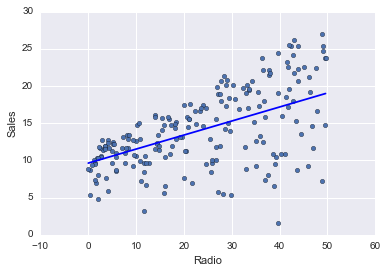

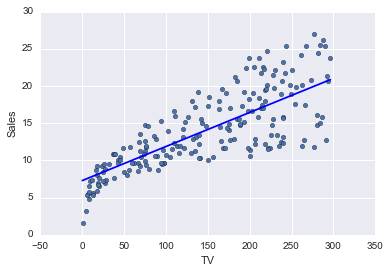

In [13]:
# Plugging in mean
df.plot("Newspaper", "Sales", kind = "scatter")
m_n = model.coef_[0]
b_n = model.intercept_ + model.coef_[1]*np.mean(df["Radio"]) + model.coef_[2]*np.mean(df["TV"])
x = np.linspace(0,max(df["Newspaper"]), 10)
abline_values = [m_n * i + b_n for i in x]
plt.plot(x, abline_values, 'b')
plt.show()
df.plot("Radio", "Sales", kind = "scatter")
m_r = model.coef_[1]
b_r = model.intercept_ + model.coef_[0]*np.mean(df["Newspaper"]) + model.coef_[2]*np.mean(df["TV"])
x = np.linspace(0,max(df["Radio"]), 10)
abline_values = [m_r * i + b_r for i in x]
plt.plot(x, abline_values, 'b')
plt.show()
df.plot("TV", "Sales", kind = "scatter")
m_t = model.coef_[2]
b_t = model.intercept_ + model.coef_[1]*np.mean(df["Radio"]) + model.coef_[0]*np.mean(df["Newspaper"])
x = np.linspace(0,max(df["TV"]), 10)
abline_values = [m_t * i + b_t for i in x]
plt.plot(x, abline_values, 'b')
plt.show()

The best fit lines for these scatter plots are not very accurate. This may be due to variables that are not predictive. Especially in the TV versus Sales data set, the best-fit line seems to be extremely off. This fitting is different from fitting in one dimension because the plane that describes the regression of this data set can intersect each of the models from various intercepts. This is why, to plot a more accurate best fit line, we plug in the means of the predictors into each two-dimensional plot. Basically, we are representing this three-dimensional set as two-dimensional plots that represent snapshots of each predictor versus sales. 

### Removing variables that are not predictive


In [14]:
df.corr(method='pearson')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


corr outputs a table that consists of the pearson correlation coefficients between each of the variables in this dataset. The diagonal contains 1, because the correlation coefficient between TV and TV, Radio and Radio, etc. is equal to 1. The values above and below the diagonal are symmetric across the diagonal. This is because the correlation coefficient between TV and Radio is the same as the correlation between Radio and TV. A highly correlated value is close to 1 or -1. A poorly correlated value is a number that is close to zero. 

In [15]:
from itertools import combinations, chain

my_list = [2,3,4,5]

for i in chain(combinations(my_list,n) for n in range(len(my_list) +1)):
    print(*i)

()
(2,) (3,) (4,) (5,)
(2, 3) (2, 4) (2, 5) (3, 4) (3, 5) (4, 5)
(2, 3, 4) (2, 3, 5) (2, 4, 5) (3, 4, 5)
(2, 3, 4, 5)


In [16]:
# ()
# (Newspaper), (TV), (Radio)
# (Newspaper, TV), (Newspaper,Radio), (Radio,TV)
# (Newspaper, TV, Radio)
y = df["Sales"]
X1 = np.array(df["Newspaper"])
X1 = X1.reshape(-1,1)
model1 = LinearRegression()
model1.fit(X1,y)
r1 = model1.score(X1,y)
print(r1)
X2 = np.array(df["Radio"])
X2 = X2.reshape(-1,1)
model2 = LinearRegression()
model2.fit(X1,y)
r2 = model2.score(X2,y)
print(r2)
X3 = np.array(df["TV"])
X3 = X3.reshape(-1,1)
model3 = LinearRegression()
model3.fit(X3,y)
r3 = model3.score(X3,y)
print(r3)
X4 = np.array(df[["Newspaper","Radio"]])
model4 = LinearRegression()
model4.fit(X4,y)
r4 = model4.score(X4,y)
print(r4)
X5 = np.array(df[["Newspaper","TV"]])
model5 = LinearRegression()
model5.fit(X5,y)
r5 = model5.score(X5,y)
print(r5)
X6 = np.array(df[["Radio","TV"]])
model6 = LinearRegression()
model6.fit(X6,y)
r6 = model6.score(X6,y)
print(r6)
X7 = np.array(df[["Newspaper","Radio","TV"]])
model7 = LinearRegression()
model7.fit(X7,y)
r7 = model7.score(X7,y)
print(r7)

0.0521204454443
0.149269203585
0.61187505085
0.33270518395
0.645835493829
0.897194261083
0.897210638179


One possible solution is to change the $R^2$ to compensate for this increase in parameters.  
Redo the above analysis with the adjusted $R^2$ below:

In [17]:
# Your code here
#R2 - (1-R2)(p/(n-p-1))
def adjustedR2(r2,p,n):
    return r2 - (1-r2)*(p/(n-p-1))
n = len(X)
r1_a = adjustedR2(r1,1,n)
print(r1_a)
r2_a = adjustedR2(r2,1,n)
print(r2_a)
r3_a = adjustedR2(r3,1,n)
print(r3_a)
r4_a = adjustedR2(r4,2,n)
print(r4_a)
r5_a = adjustedR2(r5,2,n)
print(r5_a)
r6_a = adjustedR2(r6,2,n)
print(r6_a)
r7_a = adjustedR2(r7,3,n)
print(r7_a)

0.0473331749668
0.144972583401
0.609914823834
0.32593061729
0.642239915086
0.896150547997
0.89563733162


The model with the best score is Radio, TV. The $R^2$ value is 0.896150547997. This is what is expected because both radio and TV seem to be following a trend

### Predictions


In [18]:
# Make some predictions!
print(model6.predict([5,100]))
print(model6.predict([6,101]))
print(model6.predict([7,102]))
print(model6.predict([8,103]))
print(model6.predict([9,104]))
print(model6.predict([10,105]))
print(model6.predict([11,106]))
print(model6.predict([100,300]))
print(model6.predict([200,401]))
print(model6.predict([300,501]))

[ 8.43655256]
[ 8.6703016]
[ 8.90405064]
[ 9.13779968]
[ 9.37154872]
[ 9.60529776]
[ 9.83904681]
[ 35.4469671]
[ 58.86762609]
[ 82.24253026]


C:\Users\jocel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\jocel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\jocel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarn

## Part 2: Auto

### Categorical versus continuous data
For this dataset, the only categorical variable is `origin`, relating to the origin of the car.  


### Load the dataset

Our first task is to load the data and make sure it has no missing information.  Then call `head()` on the dataset to make sure it loaded appropriately.

In [20]:
# 1. American, 2. European, 3. Japanese
df = pd.read_csv('Auto.csv', sep='\s*,\s*', header=0, encoding='ascii') # names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']) 
df.head()


C:\Users\jocel\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


### Binarize 

In [21]:
df['Am'] = df.origin.map({1:1,2:0,3:0})
df['Ja'] = df.origin.map({1:0,2:0,3:1})
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Am,Ja
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu""",1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320""",1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite""",1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst""",1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino""",1,0
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500""",1,0
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala""",1,0
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii""",1,0
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina""",1,0
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl""",1,0


### Replace all null with the median of the column

In [22]:
#your code here
all_null = df[df.isnull().any(axis = 1)]
med = []
for i in df.index.values:
    if not np.isnan(df["horsepower"][i]):
        med.append(df["horsepower"][i])
median = np.median(med)
for i in all_null.index.values:
    df.loc[i, "horsepower"] = median

### Summary Statistics and Visualizing the data
 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024AA548EE10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024AA6600470>]], dtype=object)

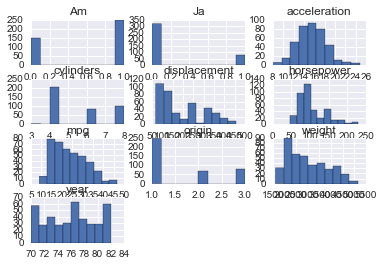

In [23]:
df.hist()

### Plot the predictors versus horsepower
#### Red represents American origin
#### Blue represents European origin
#### Green represents Japanese origin

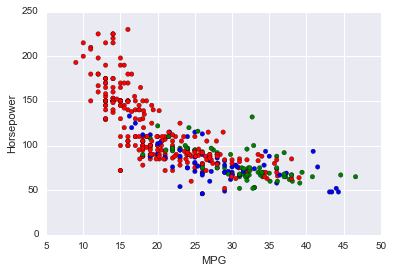

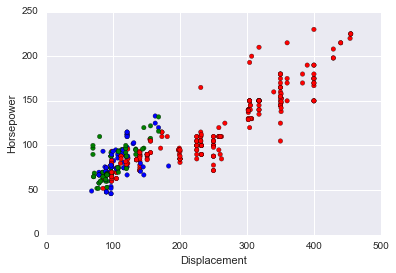

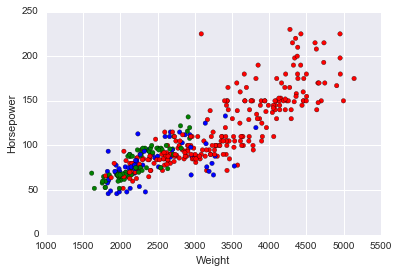

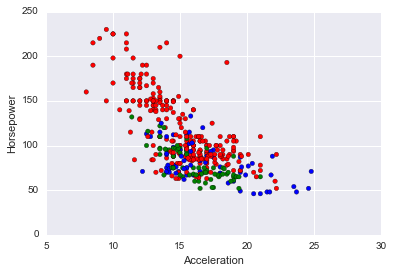

In [24]:
colors = {1:'r', 2:'b', 3:'g'}

plt.scatter(df.mpg, df.horsepower, c=df.origin.map(colors))
plt.xlabel("MPG")
plt.ylabel("Horsepower")
plt.show()
plt.scatter(df.displacement, df.horsepower, c=df.origin.map(colors))
plt.xlabel("Displacement")
plt.ylabel("Horsepower")
plt.show()
plt.scatter(df.weight, df.horsepower, c=df.origin.map(colors))
plt.xlabel("Weight")
plt.ylabel("Horsepower")
plt.show()
plt.scatter(df.acceleration, df.horsepower, c=df.origin.map(colors))
plt.xlabel("Acceleration")
plt.ylabel("Horsepower")
plt.show()

### Produce the model

In [25]:
X = np.array(df[['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'Am', 'Ja']]) 
y = df["horsepower"]

In [26]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Plot the regression for mpg, displacement, weight, and acceleration

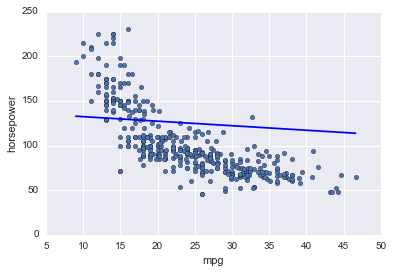

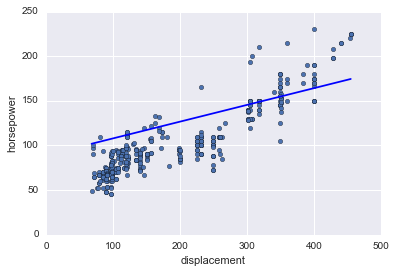

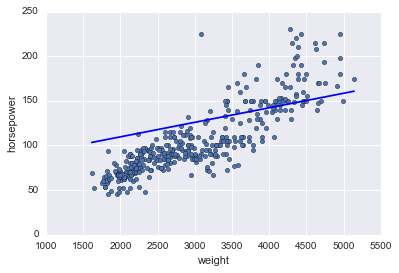

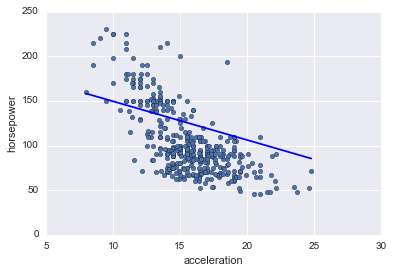

In [27]:
m1 = model.coef_[0]
m2 = model.coef_[2]
m3 = model.coef_[3]
m4 = model.coef_[4]
columns = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'Am', 'Ja']  
def find_b(var):
    b = model.intercept_
    f_columns = ['mpg', 'displacement', 'weight', 'acceleration']
    coefs = [m1, m2, m3, m4]
    for j in range(0,len(f_columns)):
        if f_columns[j] != var:
            b = b + coefs[j]*np.mean(df[f_columns[j]])
    return b
#mpg versus horsepower
df.plot('mpg', 'horsepower', kind = "scatter")
x = np.linspace(min(df['mpg']),max(df['mpg']),10)
abline_values = [m1 * j + find_b('mpg') for j in x]
plt.plot(x, abline_values, 'b')
plt.show()
#displacement versus horsepower
df.plot('displacement', 'horsepower', kind = "scatter")
x = np.linspace(min(df['displacement']),max(df['displacement']),10)
abline_values = [m2 * j + find_b('displacement') for j in x]
plt.plot(x, abline_values, 'b')
plt.show()
#weight versus horsepower
df.plot('weight', 'horsepower', kind = "scatter")
x = np.linspace(min(df['weight']),max(df['weight']),10)
abline_values = [m3 * j + find_b('weight') for j in x]
plt.plot(x, abline_values, 'b')
plt.show()
#acceleration versus horsepower
df.plot('acceleration', 'horsepower', kind = "scatter")
x = np.linspace(min(df['acceleration']),max(df['acceleration']),10)
abline_values = [m4 * j + find_b('acceleration') for j in x]
plt.plot(x, abline_values, 'b')
plt.show()



### Show the correlation

In [28]:
df.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,Am,Ja
mpg,1.000000,-0.776260,-0.804443,-0.773582,-0.831739,0.422297,0.581469,0.563698,-0.568495,0.442232
cylinders,-0.776260,1.000000,0.950920,0.841536,0.897017,-0.504061,-0.346717,-0.564972,0.607038,-0.398044
displacement,-0.804443,0.950920,1.000000,0.895765,0.933104,-0.544162,-0.369804,-0.610664,0.652830,-0.434242
horsepower,-0.773582,0.841536,0.895765,1.000000,0.862590,-0.688167,-0.413992,-0.452943,0.486385,-0.319459
weight,-0.831739,0.897017,0.933104,0.862590,1.000000,-0.419502,-0.307900,-0.581265,0.598705,-0.440862
acceleration,0.422297,-0.504061,-0.544162,-0.688167,-0.419502,1.000000,0.282901,0.210084,-0.255521,0.111876
year,0.581469,-0.346717,-0.369804,-0.413992,-0.307900,0.282901,1.000000,0.184314,-0.143628,0.195845
origin,0.563698,-0.564972,-0.610664,-0.452943,-0.581265,0.210084,0.184314,1.000000,-0.924385,0.886547
Am,-0.568495,0.607038,0.652830,0.486385,0.598705,-0.255521,-0.143628,-0.924385,1.000000,-0.643032
Ja,0.442232,-0.398044,-0.434242,-0.319459,-0.440862,0.111876,0.195845,0.886547,-0.643032,1.000000


### Find all possible combinations

In [29]:
# run me!
from itertools import combinations, chain

my_list = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'year', 'Am', 'Ja']
combos = []
for i in chain(combinations(my_list,n) for n in range(len(my_list) +1)):
    combos.append([*i])
cf = []
for x in combos:
    for c in x:
        cf.append(c)

### Find all r-squared values of every single combination of predictors and plot them versus the number of predictors

('cylinders', 'displacement', 'weight', 'acceleration', 'year', 'Am', 'Ja')


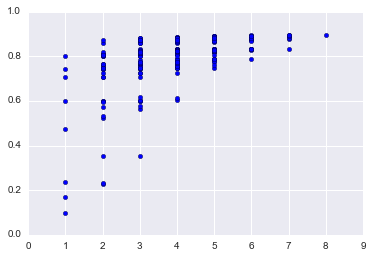

In [32]:
y = df["horsepower"]
r_val = []
x1 = [len(x) for x in cf[1:]]
for i in range(1, len(cf)):
    l = []
    for k in cf[i]:
        l.append(k)
    X1 = np.array(df[l[0:]])
    if len(cf[i]) is 1:
        X1 = X1.reshape(-1,1)
    model1 = LinearRegression()
    model1.fit(X1,y)
    r1 = model1.score(X1,y)
    n = len(X1)
    r1_a = adjustedR2(r1,len(cf[i]),n)
    r_val.append(r1_a)
idx_of_max = r_val.index(max(r_val)) + 1
print(cf[idx_of_max])
plt.scatter(x1, r_val)

### Now we see from the "elbow" of the plots of the r-squared values versus number of predictors, that the two best models are ('weight', 'acceleration') and ('displacement', 'weight', 'acceleration') From here, we can plot these two models, regress them, and plot the residuals

In [34]:
def plot_fit_data(x,y,yfit,size=1000,linewidth=10,fontsize=70,title1="data fitting",title2="residual"):

    # calculate residual
    residual = y-yfit

    # Create a Figure and subplot objects
    fig = plt.figure(figsize=(100,30))
    ax1 = fig.add_subplot(1,2,1)             
    ax2 = fig.add_subplot(1,2,2)             

    # Plot the data and the best fit line
    ax1.scatter(x, y, c='b',s=size)
    ax1.plot(x, yfit, 'k', linewidth=linewidth)
    ax1.set_title(title1,fontsize=fontsize)
    plt.xlabel('x')
    ax1.autoscale(tight=True)

    # Plot the residuals
    ax2.scatter(x, residual, c='r', s=size)
    ax2.plot([0,max(x)],[0,0], c='k', linewidth=linewidth)
    ax2.set_title(title2, fontsize = fontsize) 
    ax2.autoscale(tight=True)
    plt.xlabel('x')
    plt.ylabel('residual')
    plt.show()


### First, we model the weight, acceleration set and plot the residuals of each

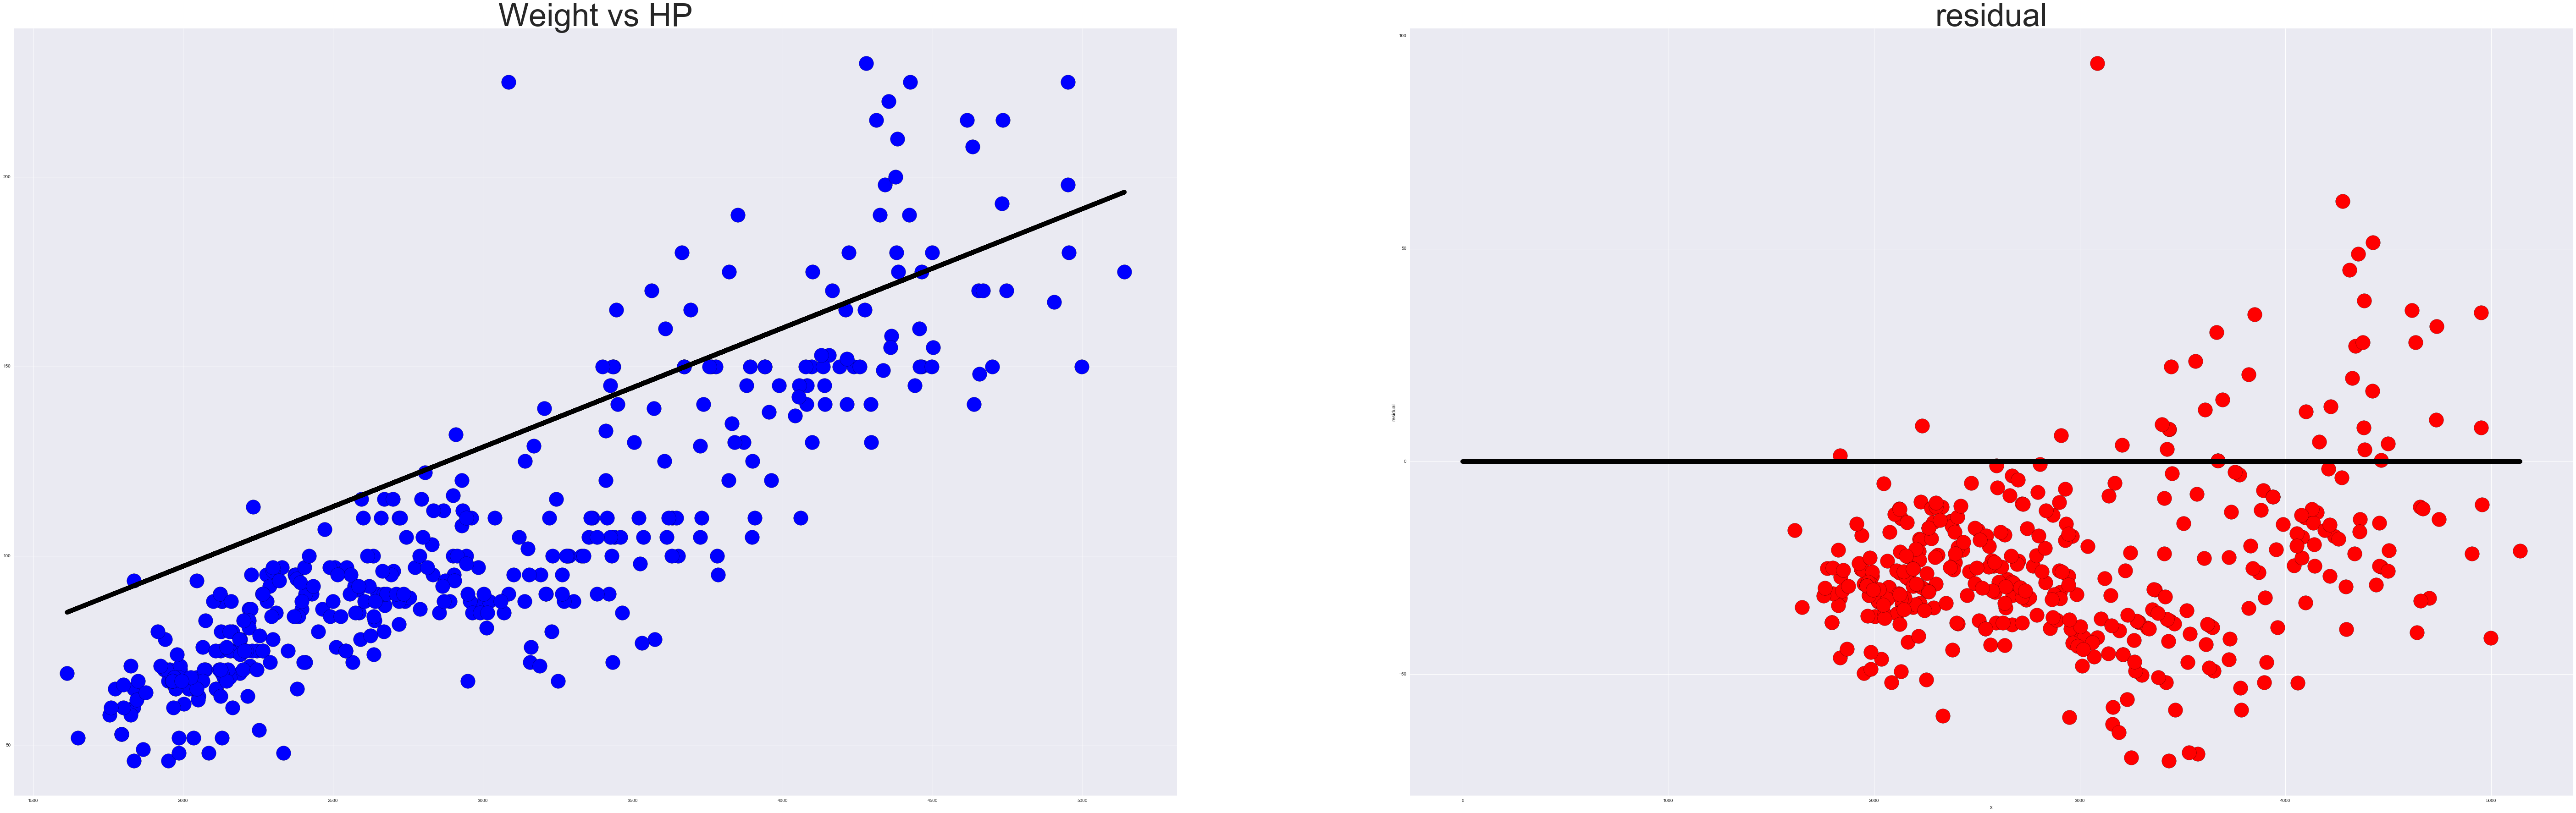

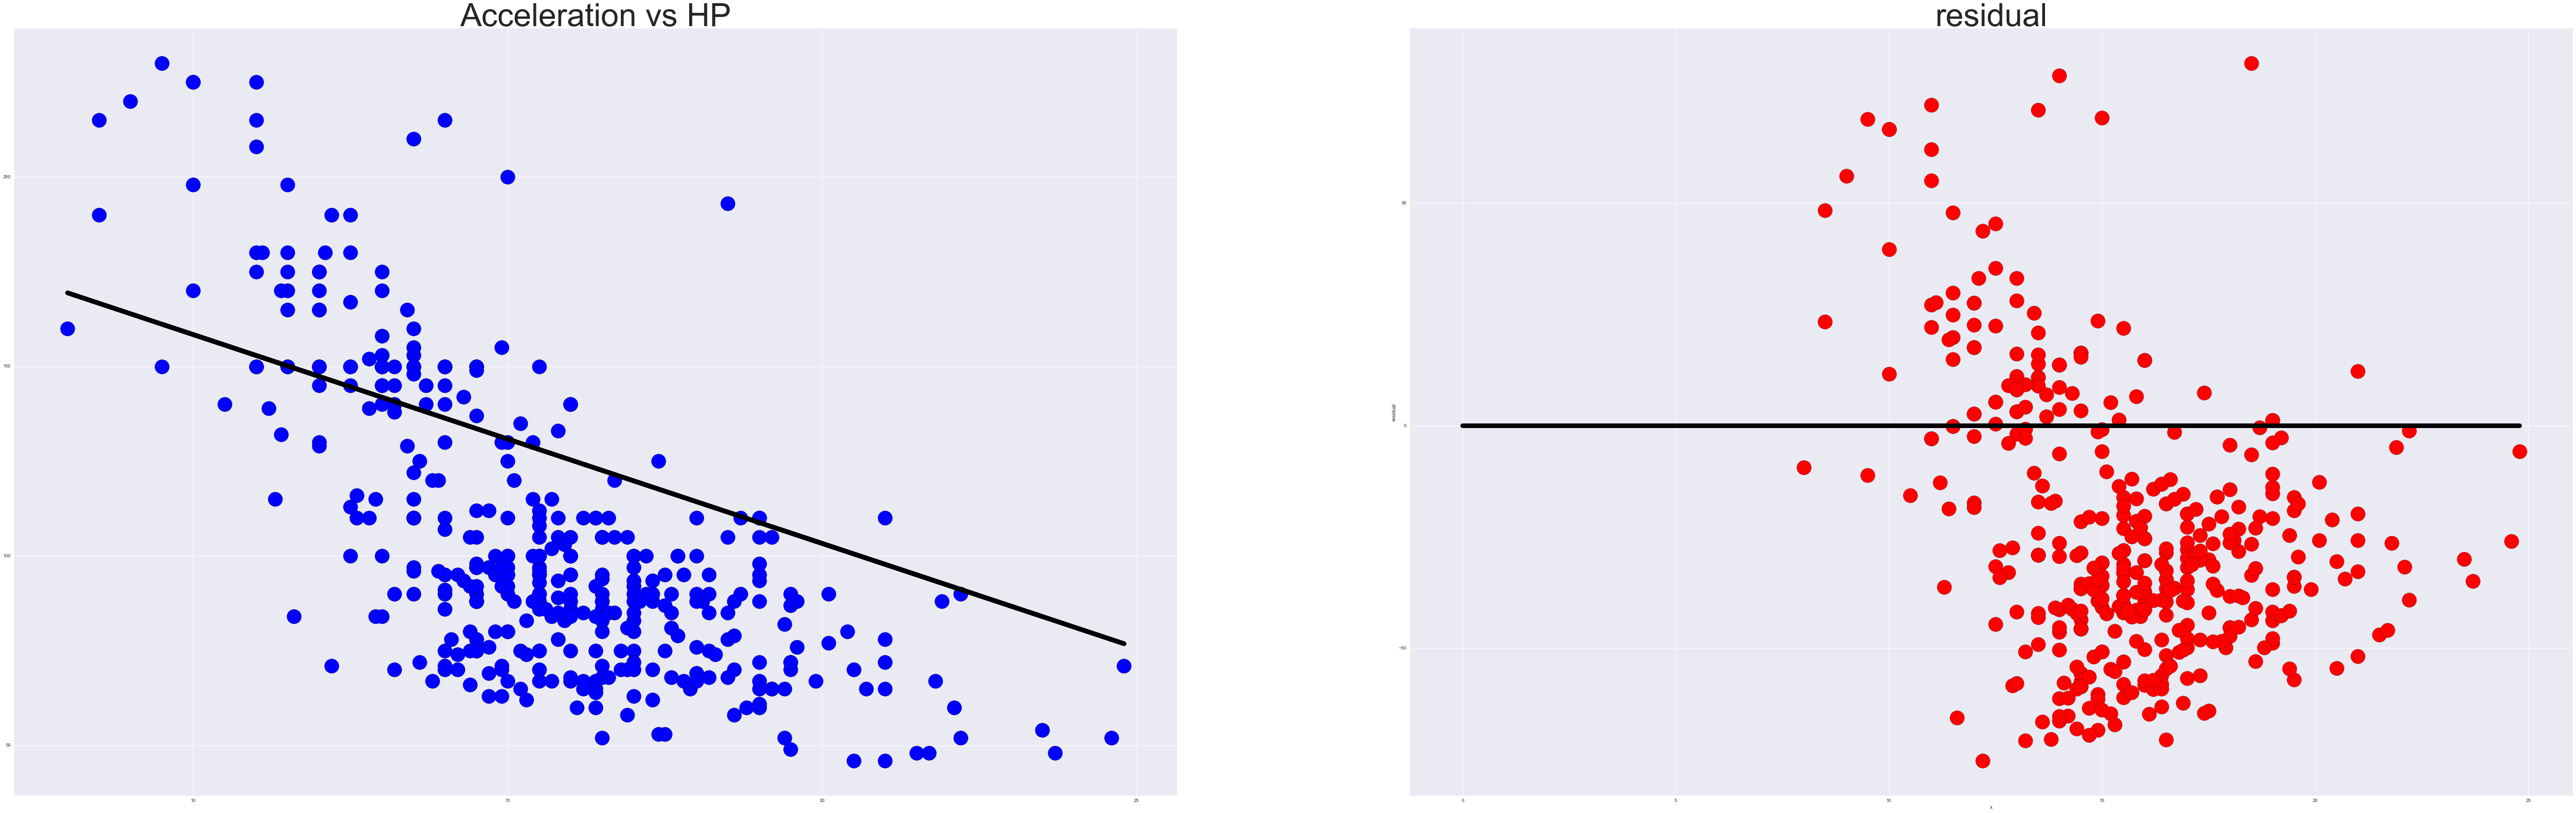

In [35]:
def find_b(var):
    b = model.intercept_
    f_columns = ['weight', 'acceleration']
    coefs = [m1, m2]
    for j in range(0,len(f_columns)):
        if f_columns[j] != var:
            b = b + coefs[j]*np.mean(df[f_columns[j]])
    return b

linreg = LinearRegression()
x1 = df[['weight', 'acceleration']]
y = df['horsepower']
linreg.fit(x1, y)
x = df['weight']
m1 = linreg.coef_[0]
m2 = linreg.coef_[1]
b = find_b('weight')
y1_fit = m1*x + b                  
dy1   = y-y1_fit     

# call the plot function to plot the results
plot_fit_data(x,y,y1_fit,title1="Weight vs HP")

x_a = df['acceleration']
b = find_b('acceleration')
y2_fit = m2*x_a + b                  
dy2   = y-y2_fit     

# call the plot function to plot the results
plot_fit_data(x_a,y,y2_fit,title1="Acceleration vs HP")

### Now plot the weight, acceleration, displacement set and their corresponding residuals

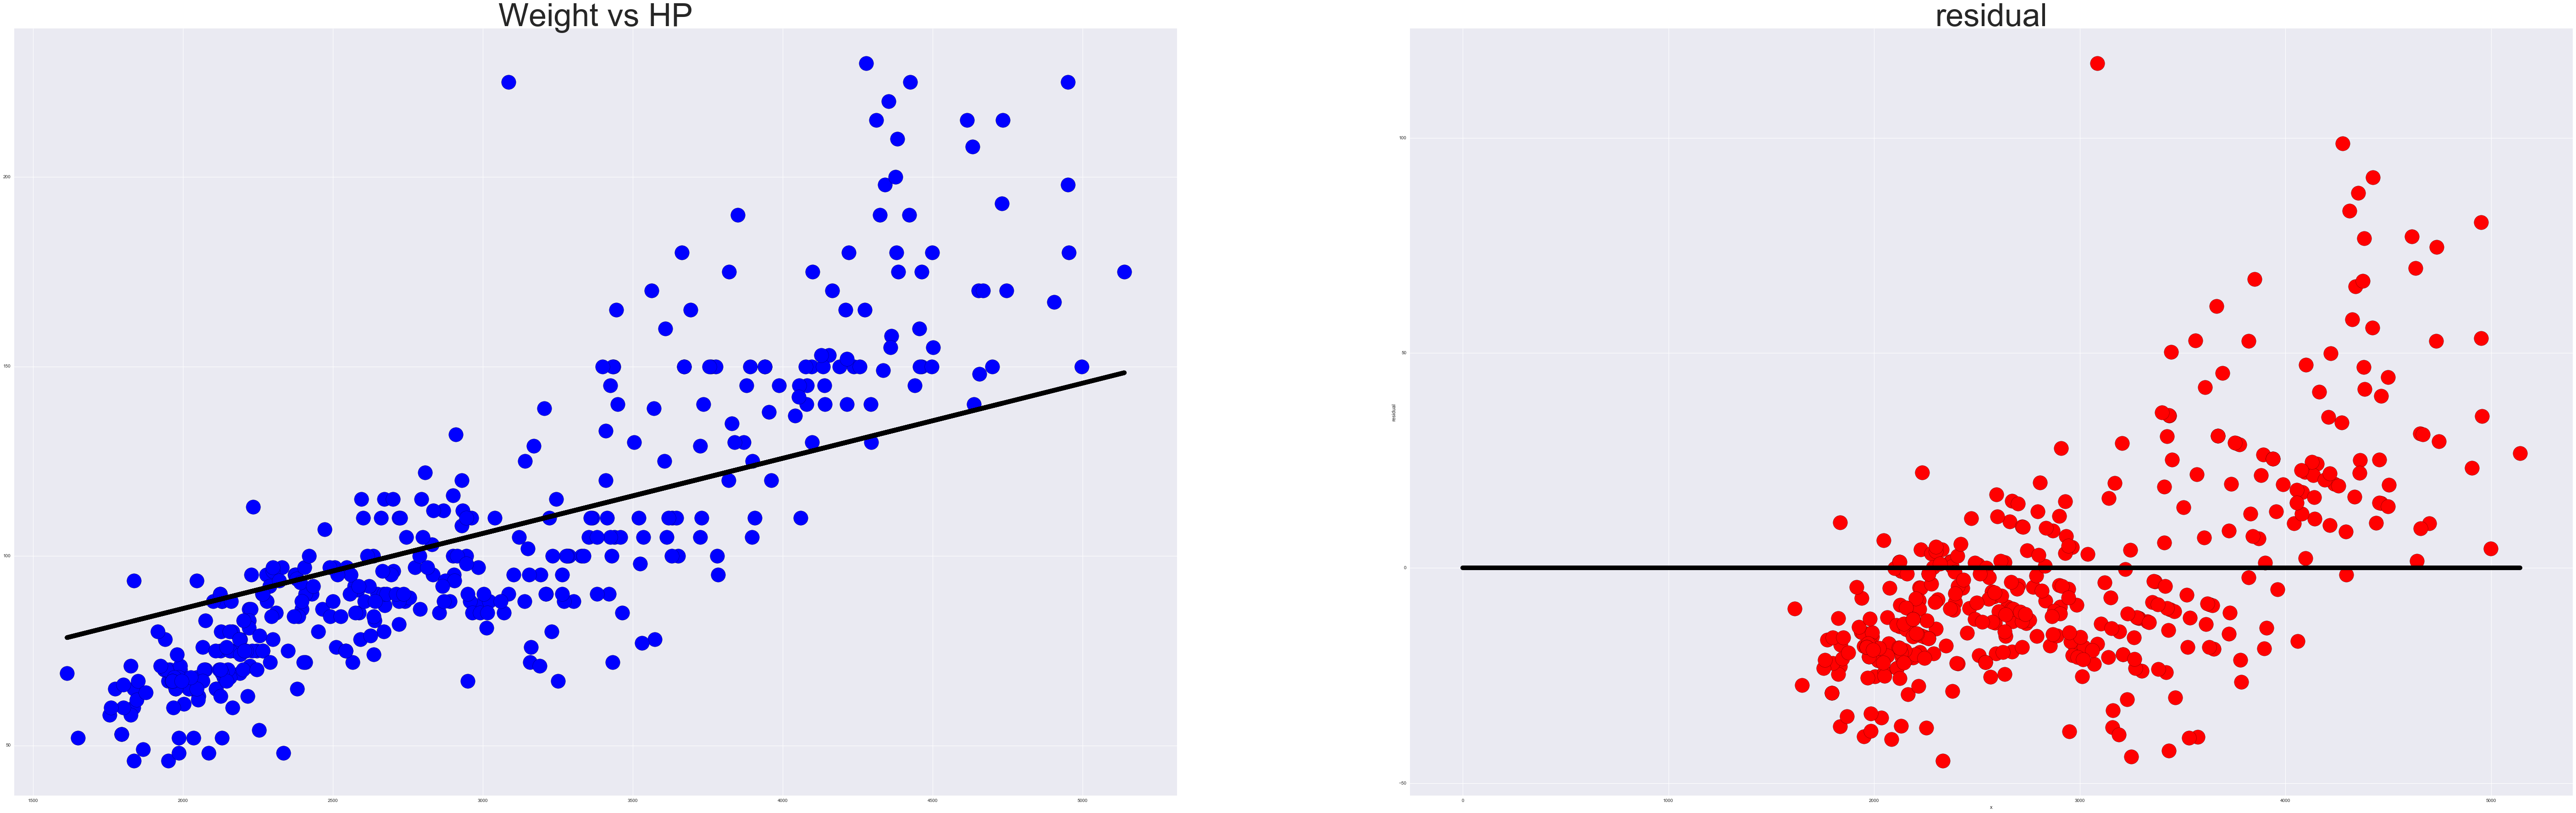

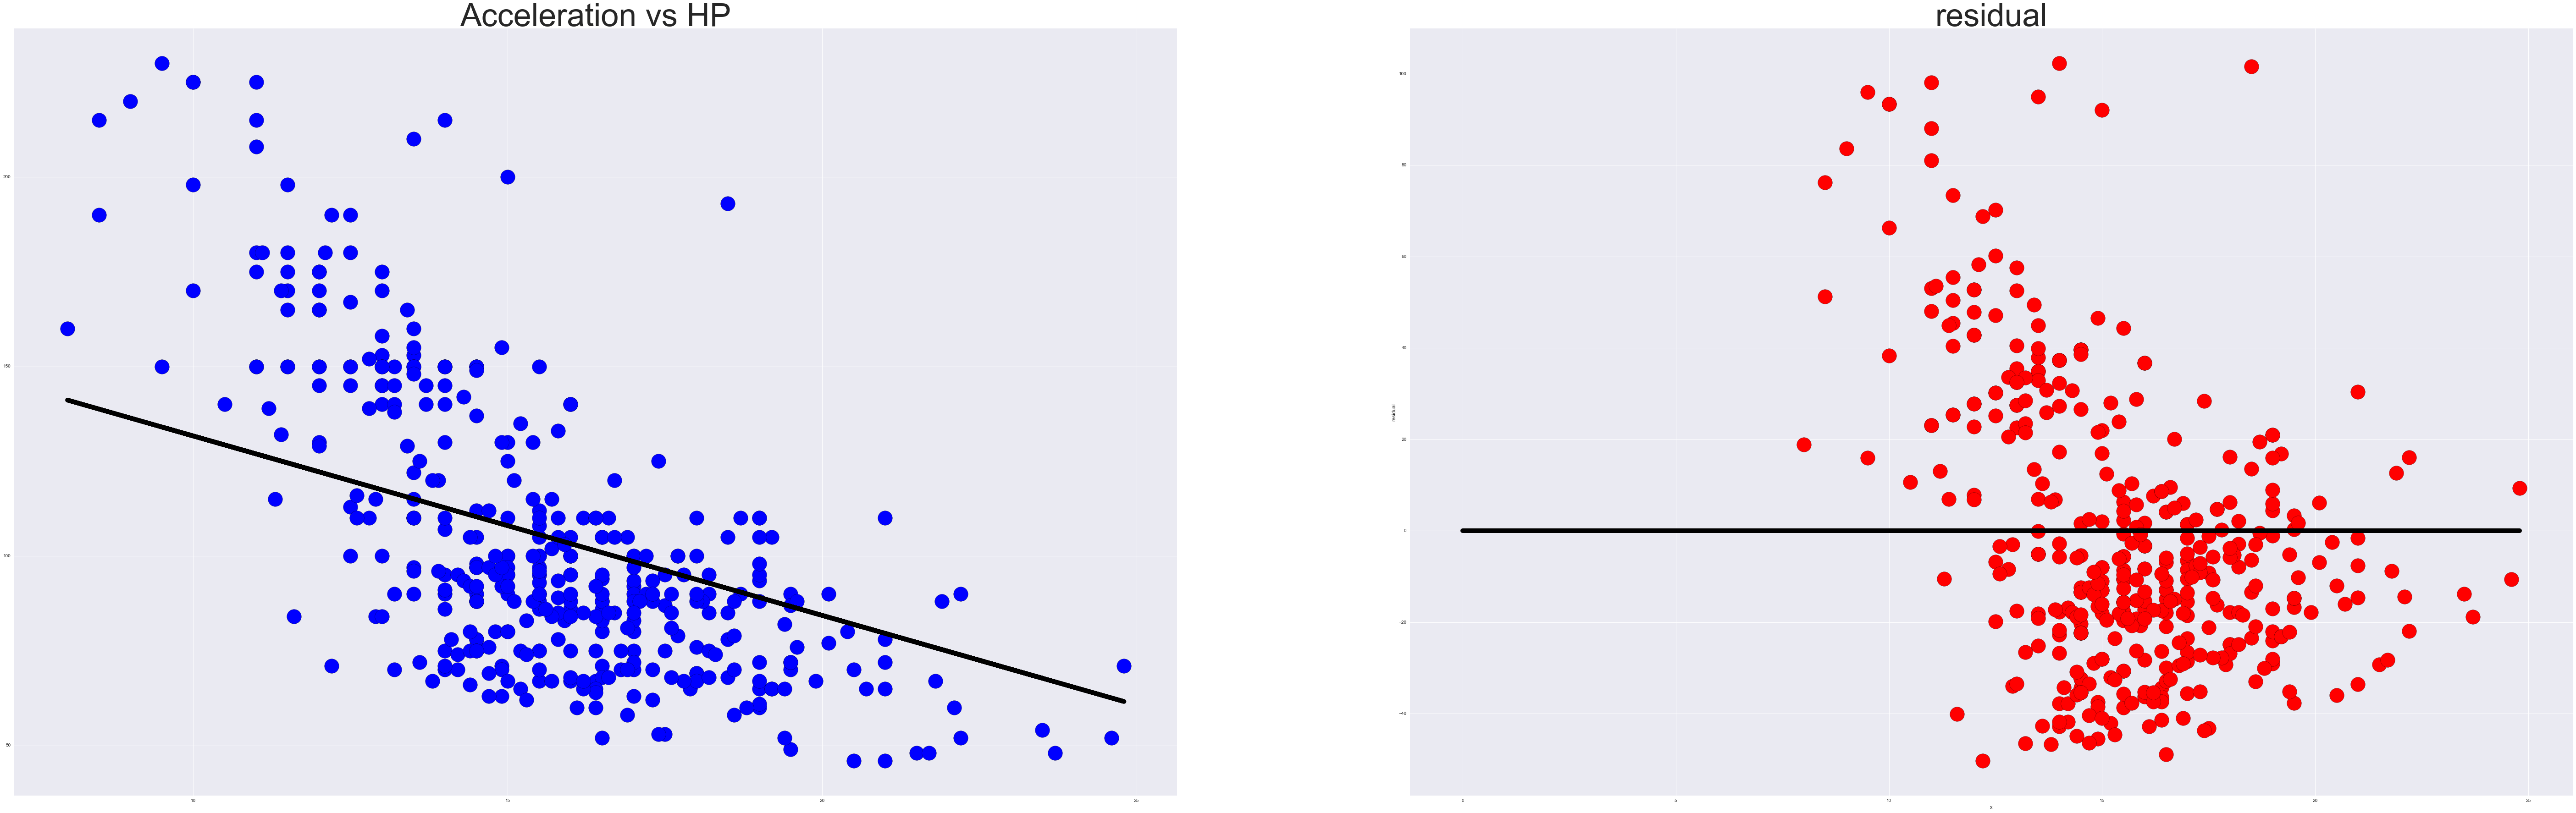

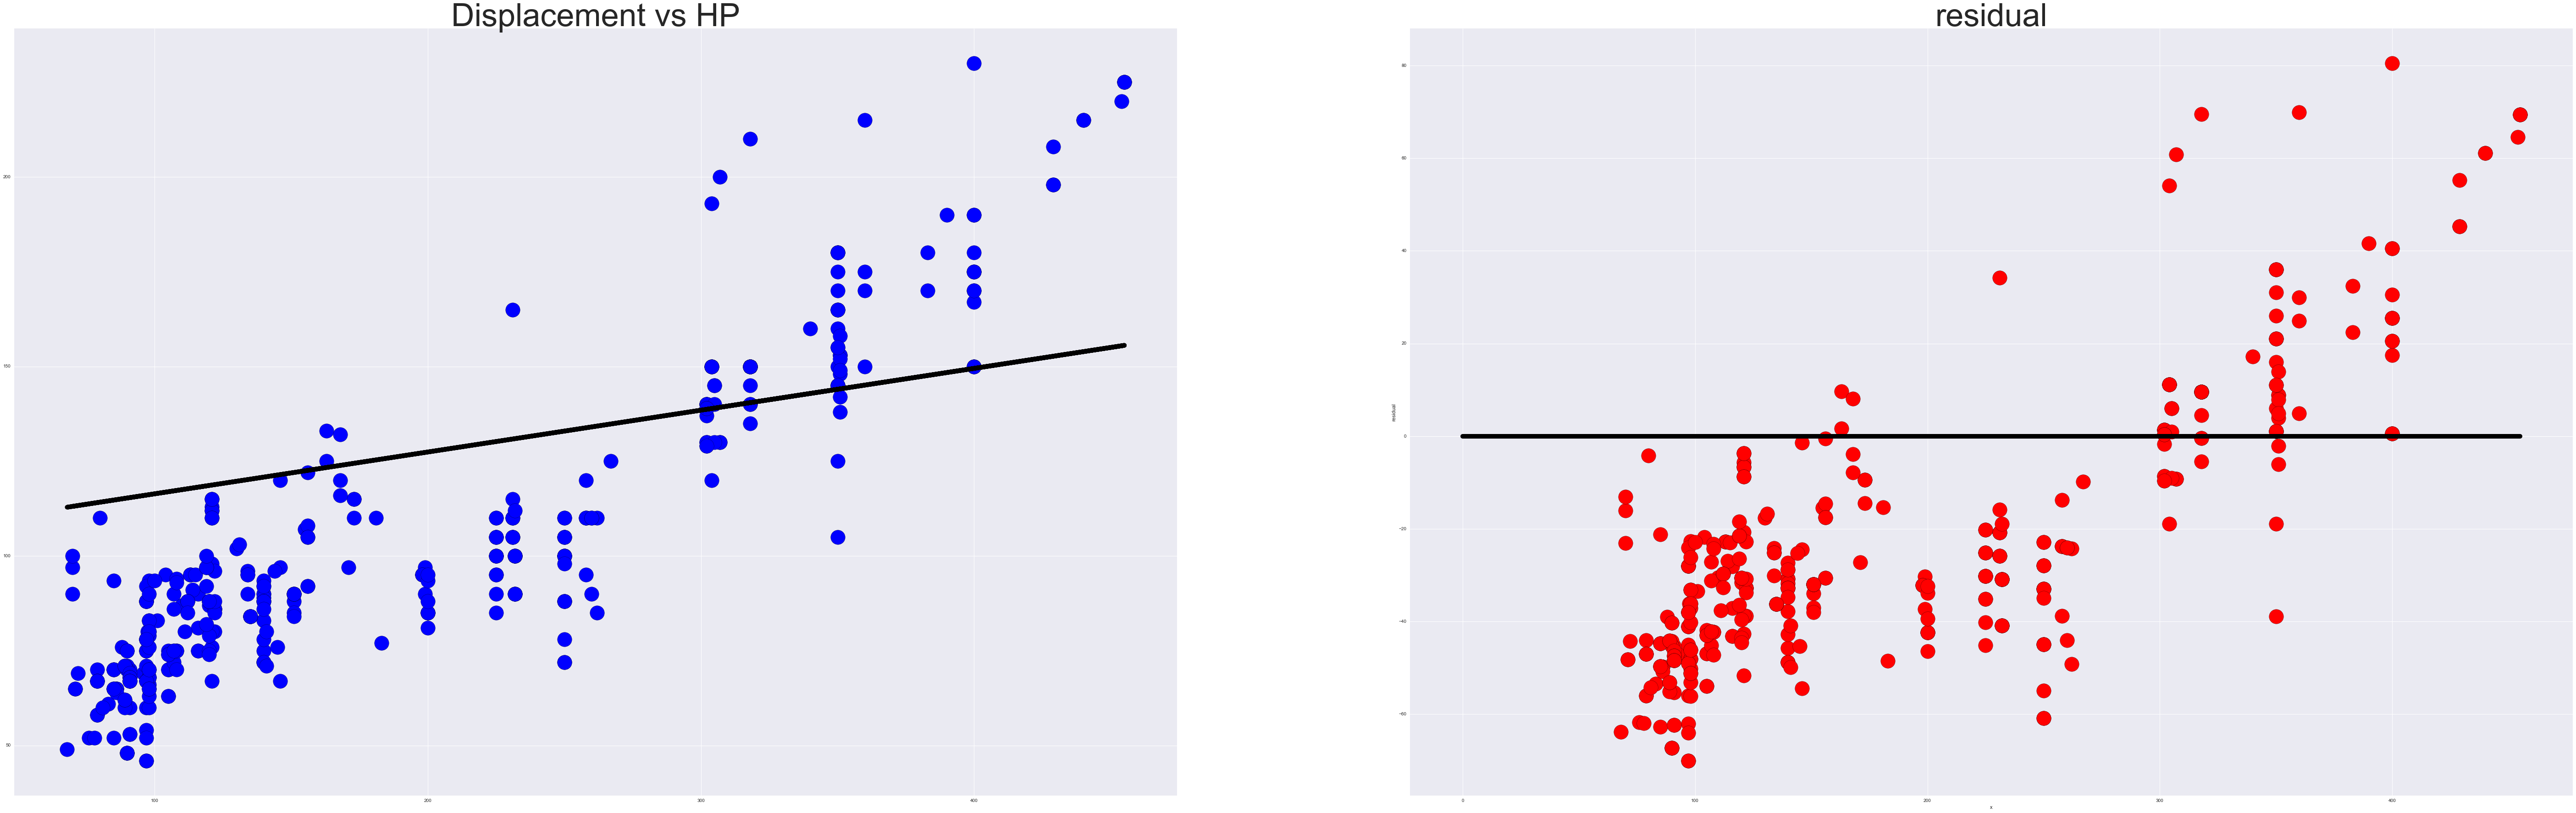

In [140]:
linreg = LinearRegression()
x2 = df[['weight', 'acceleration', 'displacement']]
y = df['horsepower']
linreg.fit(x2, y)
m1 = linreg.coef_[0]
m2 = linreg.coef_[1]
m3 = linreg.coef_[2]

x_w = df['weight']
b = find_b('weight')
y1_fit = m1*x_w + b
dy1 = y - y1_fit
# call the plot function to plot the results
plot_fit_data(x_w,y,y1_fit,title1="Weight vs HP")

x_a = df['acceleration']
b = find_b('acceleration')
y2_fit = m2*x_a + b
dy2 = y - y2_fit
# call the plot function to plot the results
plot_fit_data(x_a,y,y2_fit,title1="Acceleration vs HP")

x_d = df['displacement']
b = find_b('displacement')
y3_fit = m3*x_d + b                  
dy3   = y-y3_fit     
# call the plot function to plot the results
plot_fit_data(x_d,y,y3_fit,title1="Displacement vs HP")